# Agglomerative Clustering (Hierarchical Clustering) 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn import cluster
from sklearn import manifold

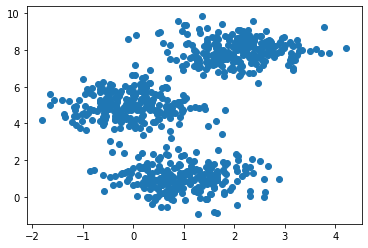

In [2]:
data, labels_true = datasets.make_blobs(n_samples=750, centers=[[1,1],[0,5],[2,8]], cluster_std=0.7,
                            random_state=0)


plt.scatter(data[:,0], data[:,1])

df = pd.DataFrame(data, columns=['X', 'Y'])

<ipython-input-1-409a480594c9>:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  label=i, color=plt.cm.jet(np.float(i) / len(np.unique(label))))
<ipython-input-1-409a480594c9>:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  label=i, color=plt.cm.jet(np.float(i) / len(np.unique(label))))


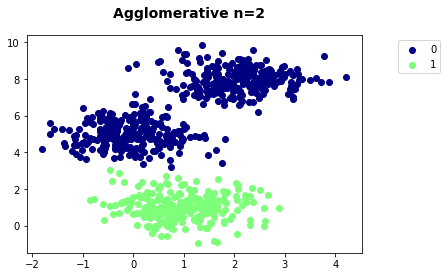

In [3]:
hclust = cluster.AgglomerativeClustering(n_clusters=2)
label = hclust.fit_predict(df)
df['label'] = label


fig = plt.figure()
fig.suptitle('Agglomerative n=2', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)

clusters = list(set(label))

for i in range(len(clusters)):
    plt.scatter(df[df.label == clusters[i]].X, df[df.label == clusters[i]].Y, 
                label=i, color=plt.cm.jet(np.float(i) / len(np.unique(label))))


plt.legend(bbox_to_anchor=(1.25, 1))

Clustering with 3 clusters

<ipython-input-1-f4b0e4f64271>:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  label=i, color=plt.cm.jet(np.float(i) / len(np.unique(label))))
<ipython-input-1-f4b0e4f64271>:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  label=i, color=plt.cm.jet(np.float(i) / len(np.unique(label))))
<ipython-input-1-f4b0e4f64271>:13: DeprecationWarn

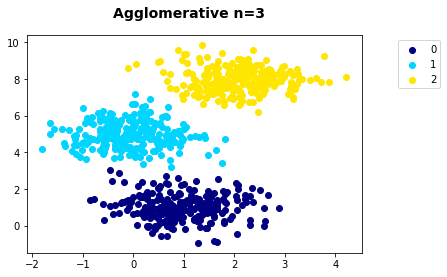

In [4]:
hclust = cluster.AgglomerativeClustering(n_clusters=3)
label = hclust.fit_predict(df)
df['label'] = label

fig = plt.figure()
fig.suptitle('Agglomerative n=3', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)

clusters = list(set(label))

for i in range(len(clusters)):
    plt.scatter(df[df.label == clusters[i]].X, df[df.label == clusters[i]].Y, 
                label=i, color=plt.cm.jet(np.float(i) / len(np.unique(label))))

plt.legend(bbox_to_anchor=(1.25, 1))

Clustering with 4 clusters

<ipython-input-1-cd1ddd3c5461>:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  label=i, color=plt.cm.jet(np.float(i) / len(np.unique(label))))
<ipython-input-1-cd1ddd3c5461>:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  label=i, color=plt.cm.jet(np.float(i) / len(np.unique(label))))
<ipython-input-1-cd1ddd3c5461>:13: DeprecationWarn

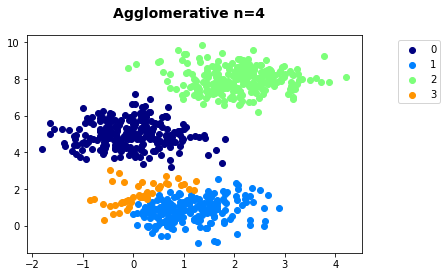

In [5]:
hclust = cluster.AgglomerativeClustering(n_clusters=4)
label = hclust.fit_predict(df)
df['label'] = label

fig = plt.figure()
fig.suptitle('Agglomerative n=4', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)

clusters = list(set(label))

for i in range(len(clusters)):
    plt.scatter(df[df.label == clusters[i]].X, df[df.label == clusters[i]].Y, 
                label=i, color=plt.cm.jet(np.float(i) / len(np.unique(label))))

plt.legend(bbox_to_anchor=(1.25, 1))

<ipython-input-1-786f718b8c21>:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  label=i, color=plt.cm.jet(np.float(i) / len(np.unique(label))))
<ipython-input-1-786f718b8c21>:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  label=i, color=plt.cm.jet(np.float(i) / len(np.unique(label))))
<ipython-input-1-786f718b8c21>:13: DeprecationWarn

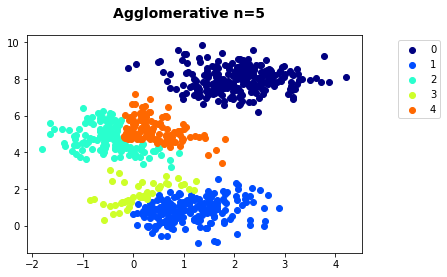

In [6]:
hclust = cluster.AgglomerativeClustering(n_clusters=5)
label = hclust.fit_predict(df)
df['label'] = label

fig = plt.figure()
fig.suptitle('Agglomerative n=5', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)

clusters = list(set(label))

for i in range(len(clusters)):
    plt.scatter(df[df.label == clusters[i]].X, df[df.label == clusters[i]].Y, 
                label=i, color=plt.cm.jet(np.float(i) / len(np.unique(label))))

plt.legend(bbox_to_anchor=(1.25, 1))

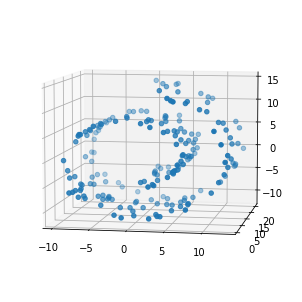

In [7]:
data, t = datasets.make_swiss_roll(n_samples=200, noise=0.1, random_state=0)

df = pd.DataFrame(data, columns=['X', 'Y', 'Z'])


fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)

ax.scatter(df.X, df.Y, df.Z, 'o')

<ipython-input-1-8c43a5207c47>:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  color=plt.cm.jet(np.float(i) / len(np.unique(label))), label=l)
<ipython-input-1-8c43a5207c47>:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  color=plt.cm.jet(np.float(i) / len(np.unique(label))), label=l)


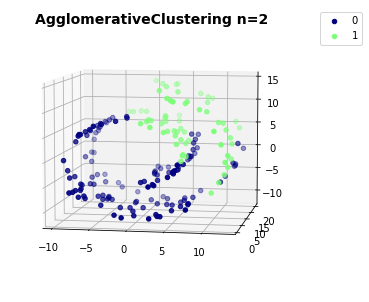

In [8]:
hclust = cluster.AgglomerativeClustering(n_clusters=2)
label = hclust.fit_predict(data)
df['label'] = label

fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)

fig.suptitle('AgglomerativeClustering n=2', fontsize=14, fontweight='bold')

for i, l in enumerate(np.unique(label)):
    ax.scatter(df[df.label == l].X, df[df.label == l].Y, df[df.label == l].Z, 'o', 
               color=plt.cm.jet(np.float(i) / len(np.unique(label))), label=l)
    
plt.legend(bbox_to_anchor=(1.25, 1))

<ipython-input-1-ad8da41e07ea>:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  color=plt.cm.jet(np.float(i) / len(np.unique(label))), label=l)
<ipython-input-1-ad8da41e07ea>:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  color=plt.cm.jet(np.float(i) / len(np.unique(label))), label=l)
<ipython-input-1-ad8da41e07ea>:13: DeprecationWarn

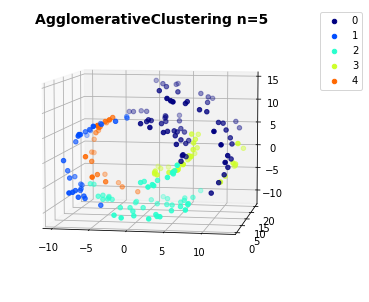

In [9]:
hclust = cluster.AgglomerativeClustering(n_clusters=5)
label = hclust.fit_predict(data)
df['label'] = label

fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)

fig.suptitle('AgglomerativeClustering n=5', fontsize=14, fontweight='bold')

for i, l in enumerate(np.unique(label)):
    ax.scatter(df[df.label == l].X, df[df.label == l].Y, df[df.label == l].Z, 'o', 
               color=plt.cm.jet(np.float(i) / len(np.unique(label))), label=l)
    
plt.legend(bbox_to_anchor=(1.25, 1))